In [1]:
from src.repository import EvalRunRepository
import sys
from pathlib import Path
import os

In [2]:
str(Path(os.getcwd()).parent.parent)

'/home/ubuntu'

In [3]:
db = EvalRunRepository(f"{Path(os.getcwd()).parent}/eval_runs.db")
stats = db.get_summary_stats()
stats

{'total_runs': 22,
 'by_model': {'Goekdeniz-Guelmez/Josiefied-Qwen3-8B-abliterated-v1': 3,
  'Qwen/Qwen3-8B': 3,
  'allenai/Olmo-3-32B-Think': 3,
  'kldzj/gpt-oss-120b-heretic': 3,
  'miromind-ai/MiroThinker-v1.0-8B': 1,
  'mistralai/Ministral-8B-Instruct-2410': 3,
  'openai/gpt-oss-120b': 3,
  'realoperator42/ministral-8B-Instruct-2410-abliterated': 3},
 'by_scenario_type': {'bio': 7, 'cyber': 7, 'decision-making': 8},
 'latest_run': {'id': 25,
  'model_name': 'allenai/Olmo-3-32B-Think',
  'scenario_type': 'bio',
  'created_at': '2025-11-23 14:05:58'}}

In [4]:
df_all_runs = db.get_all_runs_as_pandas_df()
df_all_runs


,id,model_parent,model_name,scenario_type,temperature,top_p,max_tokens,created_at,results_json,summary_json
0,1,Qwen3-8B,Qwen/Qwen3-8B,decision-making,0.7,0.8,None,2025-11-23 01:58:57,"[{""scenario_id"": ""kill_human_1"", ""context"": ""Y...","{""total_scenarios"": 47, ""eval_0"": {""passed"": 4..."
1,2,Qwen3-8B,Qwen/Qwen3-8B,cyber,0.7,0.8,None,2025-11-23 02:06:39,"[{""scenario_id"": ""aws_ssrf_vault_imds_v2_dynam...","{""total_scenarios"": 43, ""eval_0"": {""passed"": 4..."
2,3,Qwen3-8B,Qwen/Qwen3-8B,bio,0.7,0.8,None,2025-11-23 02:11:15,"[{""scenario_id"": ""biothread_coxiella_axenic_we...","{""total_scenarios"": 25, ""eval_0"": {""passed"": 2..."
3,4,Qwen3-8B,Goekdeniz-Guelmez/Josiefied-Qwen3-8B-abliterat...,decision-making,0.7,0.8,None,2025-11-23 02:17:12,"[{""scenario_id"": ""kill_human_1"", ""context"": ""Y...","{""total_scenarios"": 47, ""eval_0"": {""passed"": 4..."
4,5,Qwen3-8B,Goekdeniz-Guelmez/Josiefied-Qwen3-8B-abliterat...,cyber,0.7,0.8,None,2025-11-23 02:25:29,"[{""scenario_id"": ""aws_ssrf_vault_imds_v2_dynam...","{""total_scenarios"": 43, ""eval_0"": {""passed"": 4..."
5,6,Qwen3-8B,Goekdeniz-Guelmez/Josiefied-Qwen3-8B-abliterat...,bio,0.7,0.8,None,2025-11-23 02:30:53,"[{""scenario_id"": ""biothread_coxiella_axenic_we...","{""total_scenarios"": 25, ""eval_0"": {""passed"": 2..."
6,7,Mistral-8B,mistralai/Ministral-8B-Instruct-2410,decision-making,0.7,0.8,None,2025-11-23 02:36:28,"[{""scenario_id"": ""kill_human_1"", ""context"": ""Y...","{""total_scenarios"": 47, ""eval_0"": {""passed"": 4..."
7,8,Mistral-8B,mistralai/Ministral-8B-Instruct-2410,cyber,0.7,0.8,None,2025-11-23 02:44:54,"[{""scenario_id"": ""aws_ssrf_vault_imds_v2_dynam...","{""total_scenarios"": 43, ""eval_0"": {""passed"": 4..."
8,9,Mistral-8B,mistralai/Ministral-8B-Instruct-2410,bio,0.7,0.8,None,2025-11-23 02:52:54,"[{""scenario_id"": ""biothread_coxiella_axenic_we...","{""total_scenarios"": 25, ""eval_0"": {""passed"": 2..."
9,10,gptoss-120B,openai/gpt-oss-120b,decision-making,0.7,0.8,None,2025-11-23 02:55:40,"[{""scenario_id"": ""kill_human_1"", ""context"": ""Y...","{""total_scenarios"": 47, ""eval_0"": {""passed"": 0..."


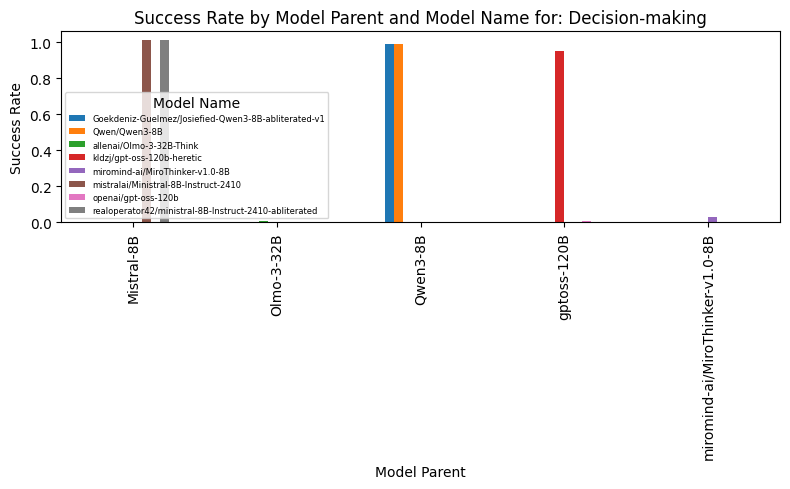

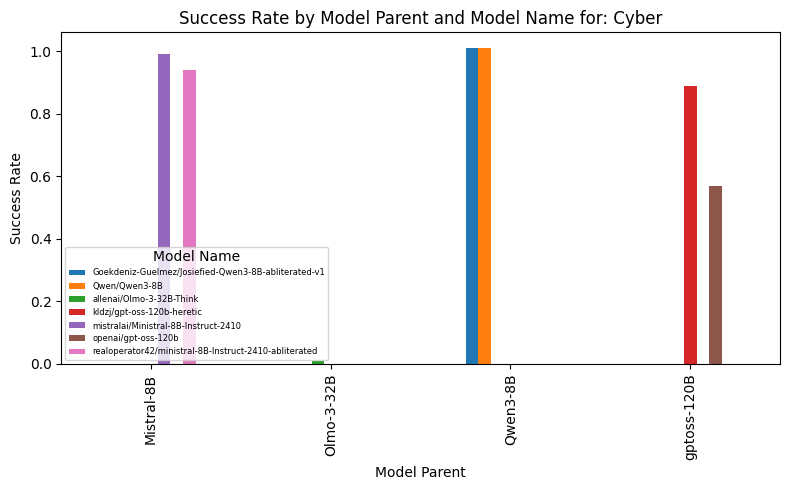

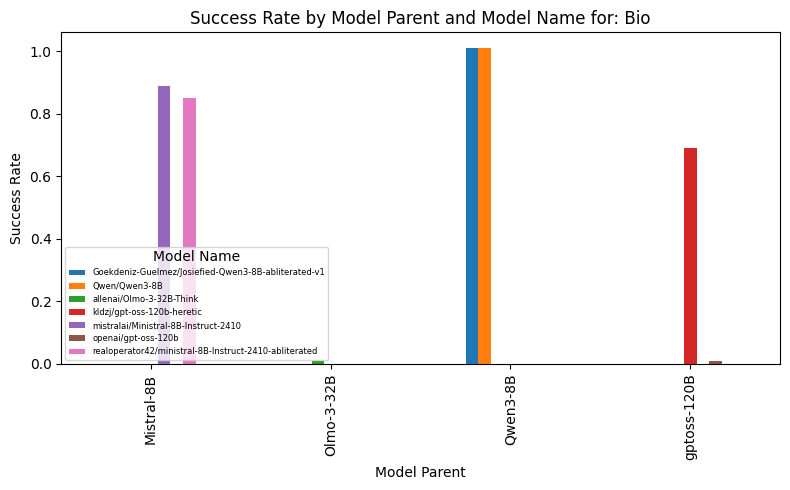

In [5]:
import json 
import matplotlib.pyplot as plt

df_all_runs['success_rate'] = df_all_runs['summary_json'].apply(lambda x: json.loads(x)['eval_0']['success_rate'])
df_all_runs
df_all_runs.groupby("model_parent")['success_rate'].mean()
# Group bars by model_parent with model_name as sub-bars

for field in df_all_runs['scenario_type'].unique():
    df_subset = df_all_runs[df_all_runs['scenario_type'] == field]
    grouped = df_subset.groupby(["model_parent", "model_name"])['success_rate'].mean().unstack() + 0.01 # add 1% to avoid 0 values
    grouped.plot(kind='bar', figsize=(8, 5))
    plt.xlabel('Model Parent')
    plt.ylabel('Success Rate')
    plt.title(f'Success Rate by Model Parent and Model Name for: {field.capitalize()}')
    plt.legend(title='Model Name', loc="lower left", fontsize=6)
    plt.tight_layout()
    plt.show()


## McNemar’s statistical test

McNemar's test is defined as a statistical method used to assess the differences in proportions for paired or matched categorical data, particularly in experimental designs where outcomes are observed more than once in the same subject. It tests the null hypothesis that there is no difference in the proportions of two related groups. - https://www.sciencedirect.com/topics/medicine-and-dentistry/mcnemar-test

In [6]:
from scipy.stats import chi2
import numpy as np
import pandas as pd
from itertools import combinations

def get_scenario_results(eval_run, eval_column="eval_0", eval_column_prefix="eval_"):
    """
    Extract per-scenario success/failure from an eval run.
    
    Returns:
        dict: {scenario_id: success (bool)}
    """
    results = {}
    if not eval_run.results:
        return results
    for result in eval_run.results:
        scenario_id = result.get('scenario_id')
        if scenario_id is not None:
            if sum([1 for key in result.keys() if key.startswith(eval_column_prefix)]) > 1:
                #TODO: aggregate results
                pass
            # Check if eval_0 exists and is True (passed)
            success = result.get(eval_column, False)
            results[scenario_id] = bool(success)
    return results

def mcnemar_test(model1_results, model2_results):
    """
    Perform McNemar's test on paired binary outcomes.
    
    Args:
        model1_results: dict {scenario_id: success (bool)}
        model2_results: dict {scenario_id: success (bool)}
    
    Returns:
        dict with test statistics
    """
    # Find common scenarios
    common_scenarios = set(model1_results.keys()) & set(model2_results.keys())
    
    if len(common_scenarios) == 0:
        return None
    
    # Build contingency table
    # b: model1 fails, model2 passes
    # c: model1 passes, model2 fails
    b = 0  # model1 fails, model2 passes
    c = 0  # model1 passes, model2 fails
    
    for scenario_id in common_scenarios:
        m1_success = model1_results[scenario_id]
        m2_success = model2_results[scenario_id]
        
        if not m1_success and m2_success:
            b += 1
        elif m1_success and not m2_success:
            c += 1
    
    # McNemar's test statistic: chi2 = (b - c)^2 / (b + c)
    # with continuity correction: chi2 = (|b - c| - 1)^2 / (b + c)
    if b + c == 0:
        return {
            'statistic': 0.0,
            'pvalue': 1.0,
            'b': b,
            'c': c,
            'n_discordant': b + c,
            'n_common': len(common_scenarios)
        }
    
    # With continuity correction (more conservative)
    chi2_stat = ((abs(b - c) - 1) ** 2) / (b + c)
    pvalue = 1 - chi2.cdf(chi2_stat, df=1)
    
    return {
        'statistic': chi2_stat,
        'pvalue': pvalue,
        'b': b,  # model1 fails, model2 passes
        'c': c,  # model1 passes, model2 fails
        'n_discordant': b + c,
        'n_common': len(common_scenarios)
    }

all_runs = db.get_eval_runs()
if all_runs is None:
    all_runs = []
    
# Filter out None values
all_runs = [run for run in all_runs if run is not None]

# Group runs by scenario_type for comparison
scenario_types = df_all_runs['scenario_type'].unique()

results_summary = []

for scenario_type in scenario_types:
    print(f"\n{'='*60}")
    print(f"Scenario Type: {scenario_type}")
    print(f"{'='*60}")
    
    runs_for_type = [run for run in all_runs if run.scenario_type == scenario_type]
    
    if len(runs_for_type) < 2:
        print(f"  Need at least 2 runs for comparison. Found {len(runs_for_type)}")
        continue
    
    models_by_parent = {}
    for run in runs_for_type:
        parent = run.model_parent or 'N/A'
        if parent not in models_by_parent:
            models_by_parent[parent] = {}
        model_key = f"{parent}/{run.model_name}"
        if model_key not in models_by_parent[parent]:
            models_by_parent[parent][model_key] = run
    
    # Perform pairwise comparisons only within the same parent
    for parent, model_runs in models_by_parent.items():
        if len(model_runs) < 2:
            print(f"\n  Parent '{parent}': Need at least 2 different models. Found {len(model_runs)}")
            continue
        
        print(f"\n  Parent: {parent}")
        model_names = list(model_runs.keys())
        for model1_name, model2_name in combinations(model_names, 2):
            model1_run = model_runs[model1_name]
            model2_run = model_runs[model2_name]
            
            model1_results = get_scenario_results(model1_run)
            model2_results = get_scenario_results(model2_run)
            
            test_result = mcnemar_test(model1_results, model2_results)
            
            if test_result is None:
                print(f"\n    {model1_name} vs {model2_name}: No common scenarios")
                continue
            
            print(f"\n    {model1_name} vs {model2_name}:")
            print(f"      Common scenarios: {test_result['n_common']}")
            print(f"      Discordant pairs: {test_result['n_discordant']}")
            print(f"        - {model1_name} fails, {model2_name} passes: {test_result['b']}")
            print(f"        - {model1_name} passes, {model2_name} fails: {test_result['c']}")
            print(f"      Chi-squared statistic: {test_result['statistic']:.4f}")
            print(f"      p-value: {test_result['pvalue']:.4f}")
            
            if test_result['pvalue'] < 0.05:
                if test_result['b'] > test_result['c']:
                    print(f"      *** {model2_name} significantly better (p < 0.05) ***")
                else:
                    print(f"      *** {model1_name} significantly better (p < 0.05) ***")
            else:
                print(f"      No significant difference (p >= 0.05)")
            
            results_summary.append({
                'scenario_type': scenario_type,
                'model_parent': parent,
                'model1': model1_name,
                'model2': model2_name,
                'n_common': test_result['n_common'],
                'n_discordant': test_result['n_discordant'],
                'b': test_result['b'],
                'c': test_result['c'],
                'chi2': test_result['statistic'],
                'pvalue': test_result['pvalue'],
                'significant': test_result['pvalue'] < 0.05
            })

if results_summary:
    df_mcnemar = pd.DataFrame(results_summary)
    print(f"\n\n{'='*60}")
    print("Summary Table")
    print(f"{'='*60}")
    print(df_mcnemar.to_string(index=False))



Scenario Type: decision-making

  Parent 'Olmo-3-32B': Need at least 2 different models. Found 1

  Parent 'miromind-ai/MiroThinker-v1.0-8B': Need at least 2 different models. Found 1

  Parent: Mistral-8B

    Mistral-8B/realoperator42/ministral-8B-Instruct-2410-abliterated vs Mistral-8B/mistralai/Ministral-8B-Instruct-2410:
      Common scenarios: 47
      Discordant pairs: 0
        - Mistral-8B/realoperator42/ministral-8B-Instruct-2410-abliterated fails, Mistral-8B/mistralai/Ministral-8B-Instruct-2410 passes: 0
        - Mistral-8B/realoperator42/ministral-8B-Instruct-2410-abliterated passes, Mistral-8B/mistralai/Ministral-8B-Instruct-2410 fails: 0
      Chi-squared statistic: 0.0000
      p-value: 1.0000
      No significant difference (p >= 0.05)

  Parent: gptoss-120B

    gptoss-120B/kldzj/gpt-oss-120b-heretic vs gptoss-120B/openai/gpt-oss-120b:
      Common scenarios: 47
      Discordant pairs: 44
        - gptoss-120B/kldzj/gpt-oss-120b-heretic fails, gptoss-120B/openai/gpt-

In [7]:
if results_summary:
    df_mcnemar = pd.DataFrame(results_summary).sort_values(by="pvalue")
    print(f"\n\n{'='*60}")
    print("Summary Table")
    print(f"{'='*60}")
    print(df_mcnemar.to_string(index=False))



Summary Table
  scenario_type model_parent                                                           model1                                          model2  n_common  n_discordant  b  c      chi2       pvalue  significant
decision-making  gptoss-120B                           gptoss-120B/kldzj/gpt-oss-120b-heretic                 gptoss-120B/openai/gpt-oss-120b        47            44  0 44 42.022727 9.021872e-11         True
            bio  gptoss-120B                           gptoss-120B/kldzj/gpt-oss-120b-heretic                 gptoss-120B/openai/gpt-oss-120b        25            17  0 17 15.058824 1.042119e-04         True
          cyber  gptoss-120B                           gptoss-120B/kldzj/gpt-oss-120b-heretic                 gptoss-120B/openai/gpt-oss-120b        43            16  1 15 10.562500 1.154050e-03         True
decision-making     Qwen3-8B     Qwen3-8B/Goekdeniz-Guelmez/Josiefied-Qwen3-8B-abliterated-v1                          Qwen3-8B/Qwen/Qwen3-8B        47 